In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("sales_data.csv",parse_dates=["date"])
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    object        
 3   price     367 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.4+ KB


In [4]:
data.describe()

,price,quantity,revenue
count,367.000000,368.000000,368.000000
mean,211.226158,14.565217,2060.679348
std,227.335170,8.595740,1910.930790
min,20.000000,3.000000,300.000000
25%,50.000000,8.000000,800.000000
50%,100.000000,12.000000,1200.000000
75%,300.000000,20.000000,2400.000000
max,1200.000000,50.000000,7200.000000


In [5]:
data.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [6]:
data.dropna(inplace=True)
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [7]:
data.isnull().sum()

date        0
product     0
category    0
price       0
quantity    0
revenue     0
dtype: int64

In [8]:
data[data.duplicated()] # check if there any duplicated values

,date,product,category,price,quantity,revenue
276,2022-10-01,Hoodie,Clothing,40.0,30.0,1200.0


In [9]:
data.iloc[270:280,:]

,date,product,category,price,quantity,revenue
273,2022-09-29,Headphones,Electronics,100.0,10.0,1000.0
274,2022-09-30,Smartphone,Electronics,600.0,11.0,6600.0
275,2022-10-01,Hoodie,Clothing,40.0,30.0,1200.0
276,2022-10-01,Hoodie,Clothing,40.0,30.0,1200.0
277,2022-10-02,Smartphone,Electronics,600.0,10.0,6000.0
278,2022-10-03,Speaker,Electronics,80.0,25.0,2000.0
279,2022-10-04,Coat,Clothing,100.0,15.0,1500.0
280,2022-10-05,Smartwatch,Accessories,200.0,10.0,2000.0
281,2022-10-06,Smartphone,Electronics,600.0,7.0,4200.0
282,2022-10-07,Backpack,Bags,50.0,18.0,900.0


In [10]:
# the average price of a product sold by the company
product_price = data.groupby("product")["price"].mean()
product_price

product
Backpack        50.0
Coat           100.0
Headphones     100.0
Hoodie          40.0
Jeans           50.0
Laptop        1200.0
Smartphone     600.0
Smartwatch     200.0
Sneakers        80.0
Speaker         80.0
T-Shirt         20.0
Tablet         400.0
Wallet          30.0
Watch          150.0
Name: price, dtype: float64

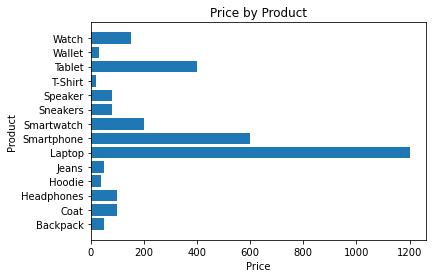

In [11]:
plt.barh(product_price.index, product_price.values)
plt.xlabel('Price')
plt.ylabel('Product')
plt.title('Price by Product')
plt.show()

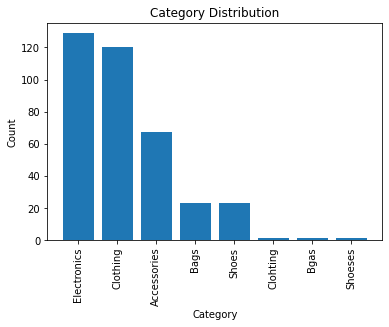

In [12]:
category_counts = data['category'].value_counts()

# Plotting the category distribution
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

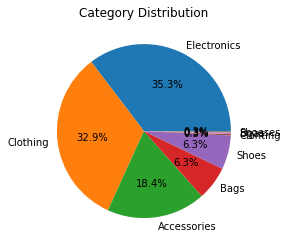

In [13]:
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

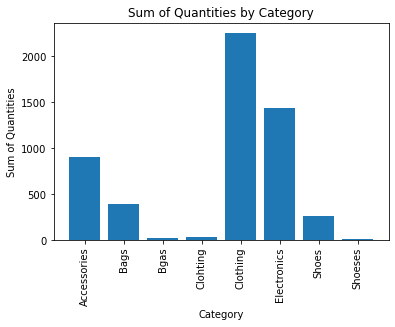

In [14]:
category_sum = data.groupby('category')['quantity'].sum()

# Plotting the sum of quantities
plt.bar(category_sum.index, category_sum.values)
plt.xlabel('Category')
plt.ylabel('Sum of Quantities')
plt.title('Sum of Quantities by Category')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

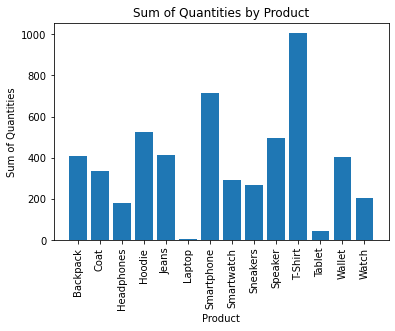

In [15]:
product_sum = data.groupby('product')['quantity'].sum()

# Plotting the sum of quantities
plt.bar(product_sum.index, product_sum.values)
plt.xlabel('Product')
plt.ylabel('Sum of Quantities')
plt.title('Sum of Quantities by Product')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

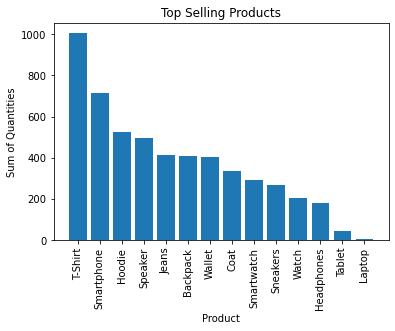

In [16]:
sorted_product_sum = product_sum.sort_values(ascending=False)
plt.bar(sorted_product_sum.index, sorted_product_sum.values)
plt.xlabel('Product')
plt.ylabel('Sum of Quantities')
plt.title('Top Selling Products')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

In [17]:
print(f"The total quantity of products sold by the company: {int(sum(product_sum))} ")

The total quantity of products sold by the company: 5300 


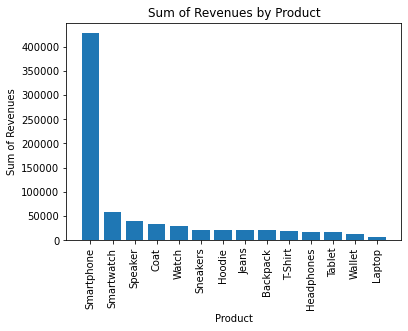

In [18]:
revenue_sum = data.groupby('product')['revenue'].sum()
sorted_revenue_sum = revenue_sum.sort_values(ascending=False)

# Plotting the sum of quantities
plt.bar(sorted_revenue_sum.index, sorted_revenue_sum.values)
plt.xlabel('Product')
plt.ylabel('Sum of Revenues')
plt.title('Sum of Revenues by Product')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

In [19]:
print(f"The Total Revenue :{sum(revenue_sum):.3f} $")

The Total Revenue :748430.000 $


In [20]:
print(f"The highest revenue is for Smartphones: {sorted_revenue_sum[0]} $")

The highest revenue is for Smartphones: 427800.0 $


In [21]:
total_revenue = data['revenue'].sum()
number_of_sales = data['quantity'].sum()

# Calculating the average revenue per sale
average_revenue_per_sale = total_revenue / number_of_sales

print(f"Average Revenue per Sale: {average_revenue_per_sale:.2f} $")

Average Revenue per Sale: 141.21 $


In [23]:
# Extract the quarter from the date column
data['quarter'] = data['date'].dt.quarter

# Calculate the total revenue per quarter
revenue_per_quarter = data.groupby('quarter')['revenue'].sum()

# Print the total revenue per quarter
revenue_per_quarter

quarter
1    182100.0
2    177370.0
3    195430.0
4    193530.0
Name: revenue, dtype: float64

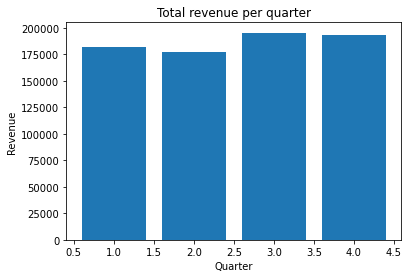

In [24]:
plt.bar(revenue_per_quarter.index, revenue_per_quarter.values)
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.title("Total revenue per quarter")
plt.show()

In [25]:
# Extract the quarter from the date column
data['month'] = data['date'].dt.month

# Calculate the total revenue per quarter
revenue_per_month = data.groupby('month')['revenue'].sum()

# Print the total revenue per quarter
revenue_per_month

month
1     65800.0
2     53740.0
3     62560.0
4     55800.0
5     62910.0
6     58660.0
7     67260.0
8     65260.0
9     62910.0
10    66460.0
11    63060.0
12    64010.0
Name: revenue, dtype: float64

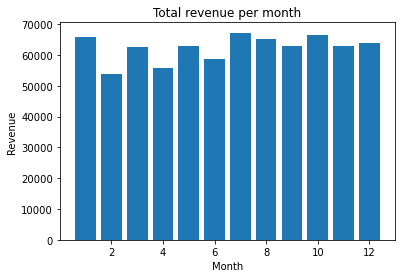

In [26]:
plt.bar(revenue_per_month.index, revenue_per_month.values)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Total revenue per month")
plt.show()